In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

## Libraries

In [3]:
import cv2
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

## Preprocessing(Training Data)

In [4]:
d = os.path.join("../../Training_Data(80)/train")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [5]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 1448
Images of label "Metal":	 1485
Images of label "Paper":	 1491
Images of label "Plastic":	 1421
Images of label "Trash":	 1766


In [6]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [7]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [8]:
x_train=np.array(X)
y_train=np.array(Y)
print(x_train.shape,y_train.shape)

(7611, 224, 224, 3) (7611,)


## Preprocessing(Testing Data)

In [9]:
d = os.path.join("../../Training_Data(80)/val")

In [10]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 371
Images of label "Metal":	 371
Images of label "Paper":	 373
Images of label "Plastic":	 357
Images of label "Trash":	 441


In [11]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [12]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [13]:
x_test=np.array(X)
y_test=np.array(Y)
print(x_test.shape,y_test.shape)

(1913, 224, 224, 3) (1913,)


In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7611, 224, 224, 3) (7611,)
(1913, 224, 224, 3) (1913,)


## Build Model

In [15]:
model_mobileNet=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [16]:
model_mobileNet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [17]:
base_input1=model_mobileNet.layers[0].input
base_output1=model_mobileNet.layers[-2].output

final_output1 = layers.Dense(128)(base_output1)
final_output1 = layers.Activation('relu')(final_output1)
final_output1 = layers.Dense(64)(final_output1)
final_output1 = layers.Activation('relu')(final_output1)
final_output1 = layers.Dense(5, activation='softmax')(final_output1)

In [18]:
new_model_mobileNet = tf.keras.Model(inputs = base_input1, outputs = final_output1)

In [19]:
new_model_mobileNet.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

## Train Model

In [20]:
history=new_model_mobileNet.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
238/238 [==============================] - 218s 902ms/step - loss: 0.6834 - accuracy: 0.7525 - val_loss: 0.9717 - val_accuracy: 0.6325
Epoch 2/20
238/238 [==============================] - 214s 899ms/step - loss: 0.2265 - accuracy: 0.9212 - val_loss: 0.5975 - val_accuracy: 0.7757
Epoch 3/20
238/238 [==============================] - 214s 898ms/step - loss: 0.1019 - accuracy: 0.9674 - val_loss: 0.4454 - val_accuracy: 0.8385
Epoch 4/20
238/238 [==============================] - 213s 895ms/step - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.4840 - val_accuracy: 0.8427
Epoch 5/20
238/238 [==============================] - 214s 901ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.2909 - val_accuracy: 0.8975
Epoch 6/20
238/238 [==============================] - 214s 901ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.3917 - val_accuracy: 0.8803
Epoch 7/20
238/238 [==============================] - 214s 901ms/step - loss: 0.0189 - accuracy: 0.9949 - val_loss: 0.2931 -

## Accuracy

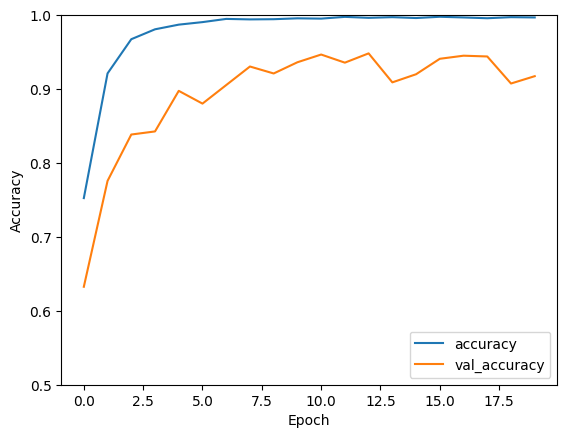

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

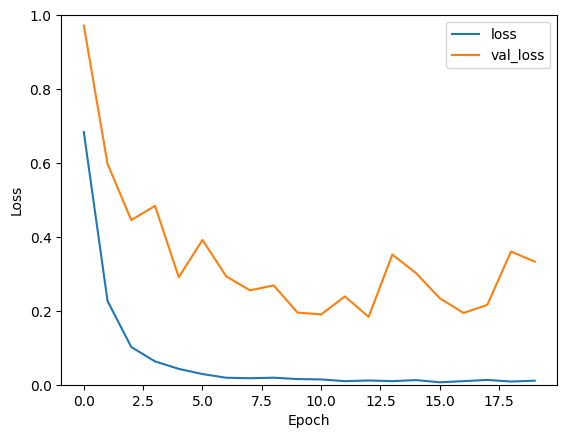

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

In [23]:
loss , accuracy = new_model_mobileNet.evaluate(x_test,y_test)

60/60 [==============================] - 12s 206ms/step - loss: 0.3331 - accuracy: 0.9174


In [24]:
y_pred = new_model_mobileNet.predict(x_test).round(2)

60/60 [==============================] - 12s 192ms/step


[[348   8   5   8   2]
 [  4 336  26   4   1]
 [  0   0 372   0   1]
 [ 10   6   7 332   2]
 [  6   5  59   3 368]]


<Axes: >

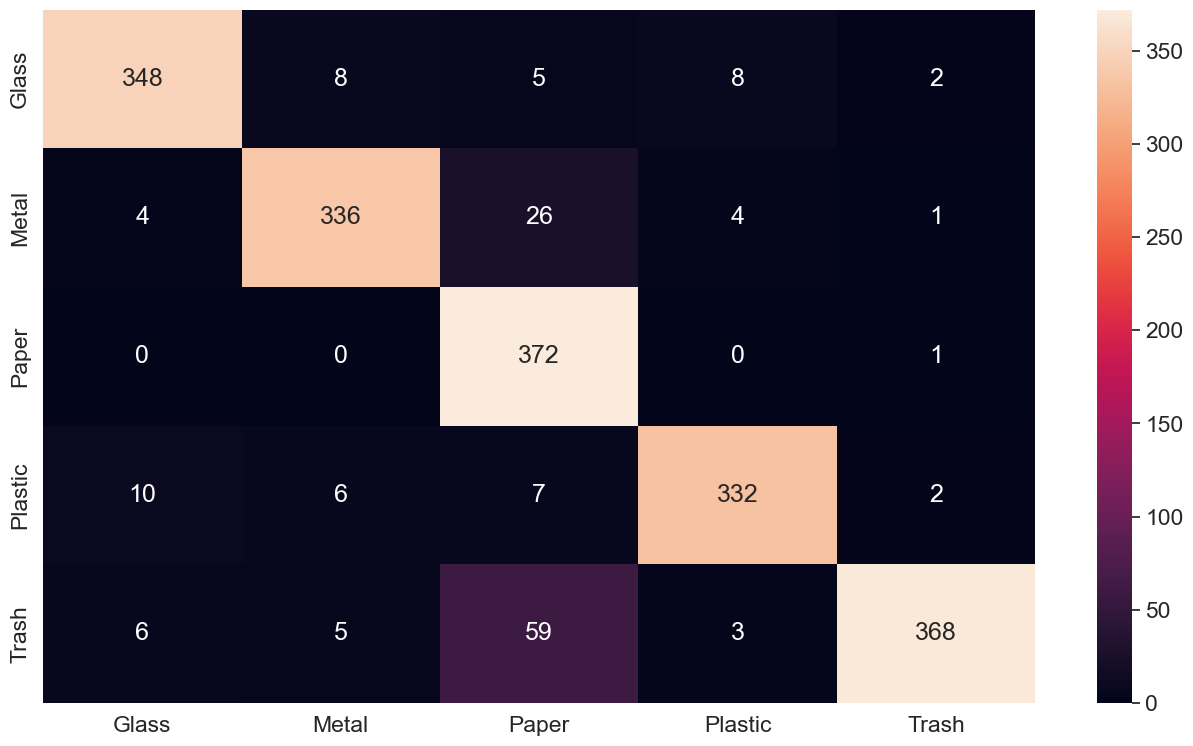

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [26]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=classes)
print(cr)

              precision    recall  f1-score   support

       Glass       0.95      0.94      0.94       371
       Metal       0.95      0.91      0.93       371
       Paper       0.79      1.00      0.88       373
     Plastic       0.96      0.93      0.94       357
       Trash       0.98      0.83      0.90       441

    accuracy                           0.92      1913
   macro avg       0.93      0.92      0.92      1913
weighted avg       0.93      0.92      0.92      1913



# Save The Model

In [27]:
# serialize model to JSON
model_json = new_model_mobileNet.to_json()
with open("MobileNet_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_mobileNet.save_weights("MobileNet_model.h5")

## Saving Model In Drive

In [28]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [29]:
# !ls "/content/gdrive/My Drive"

In [30]:
# model_json = new_model_mobileNet.to_json()
# with open("/content/gdrive/My Drive/Colab Notebooks/MobileNet2_model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# new_model_mobileNet.save_weights("/content/gdrive/My Drive/Colab Notebooks/MobileNet2_model.h5")

In [31]:
# !ls "/content/gdrive/My Drive/Colab Notebooks"